# Library Import

In [189]:
# Import packages & setting random seed according to the student ID
import numpy as np
np.random.seed(23520131)
import matplotlib.pyplot as plt

# Import packages to use LinearRegression & PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Import mean squared error package for E_in and E_out calculation
from sklearn.metrics import mean_squared_error

In [190]:
# Create target function -> sin(1 + x^2) 
def target_func(x):
    return np.sin(1 + x**2)

In [191]:
def dataset_randomize(n):
    X_train = np.random.uniform(0, 1, n)
    y_train = target_func(X_train) + np.random.normal(0, 3*1e-2, n)
    X_test = np.random.uniform(0, 1, n)
    y_test = target_func(X_test) + np.random.normal(0, 3*1e-2, n)
    return X_train.reshape(-1, 1), y_train, X_test.reshape(-1, 1), y_test

# Experiment 1 with N = 10

In [192]:
# Create datasets for D1, D2 and D3 by randomizing with N = 10
N = 10

D1_X_train, D1_y_train, D1_X_test, D1_y_test = dataset_randomize(N)
D2_X_train, D2_y_train, D2_X_test, D2_y_test = dataset_randomize(N)
D3_X_train, D3_y_train, D3_X_test, D3_y_test = dataset_randomize(N)

# Drawing plots for each dataset

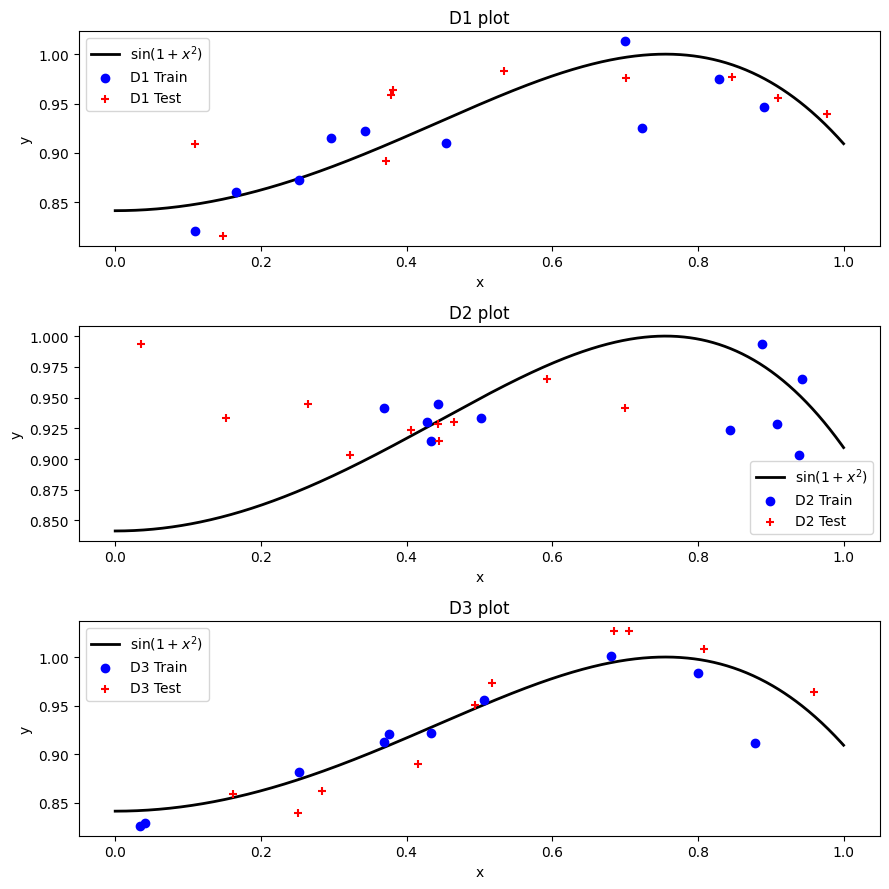

In [193]:
X_val = np.linspace(0, 1, 1000)
y_val = target_func(X_val)
plt.figure(figsize=(9, 9))

# D1
plt.subplot(3, 1, 1)
plt.plot(X_val, y_val, color='black', label=r'$\sin(1 + x^2)$', linewidth=2)  
plt.scatter(D1_X_train, D1_y_train, color='blue', label='D1 Train', zorder=5)
plt.scatter(D1_X_test, D1_y_test, color='red', marker='+', label='D1 Test', zorder=5)
plt.title('D1 plot')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# D2
plt.subplot(3, 1, 2)
plt.plot(X_val, y_val, color='black', label=r'$\sin(1 + x^2)$', linewidth=2)  
plt.scatter(D2_X_train, D2_y_train, color='blue', label='D2 Train', zorder=5)
plt.scatter(D2_X_test, D2_y_train, color='red', marker='+', label='D2 Test', zorder=5)
plt.title('D2 plot')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# D3
plt.subplot(3, 1, 3)
plt.plot(X_val, y_val, color='black', label=r'$\sin(1 + x^2)$', linewidth=2)  
plt.scatter(D3_X_train, D3_y_train, color='blue', label='D3 Train', zorder=5)
plt.scatter(D3_X_test, D3_y_test, color='red', marker='+', label='D3 Test', zorder=5)
plt.title('D3 plot')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

In [194]:
pf_list = [PolynomialFeatures(i) for i in range(1, 10)]

### For D1 Dataset

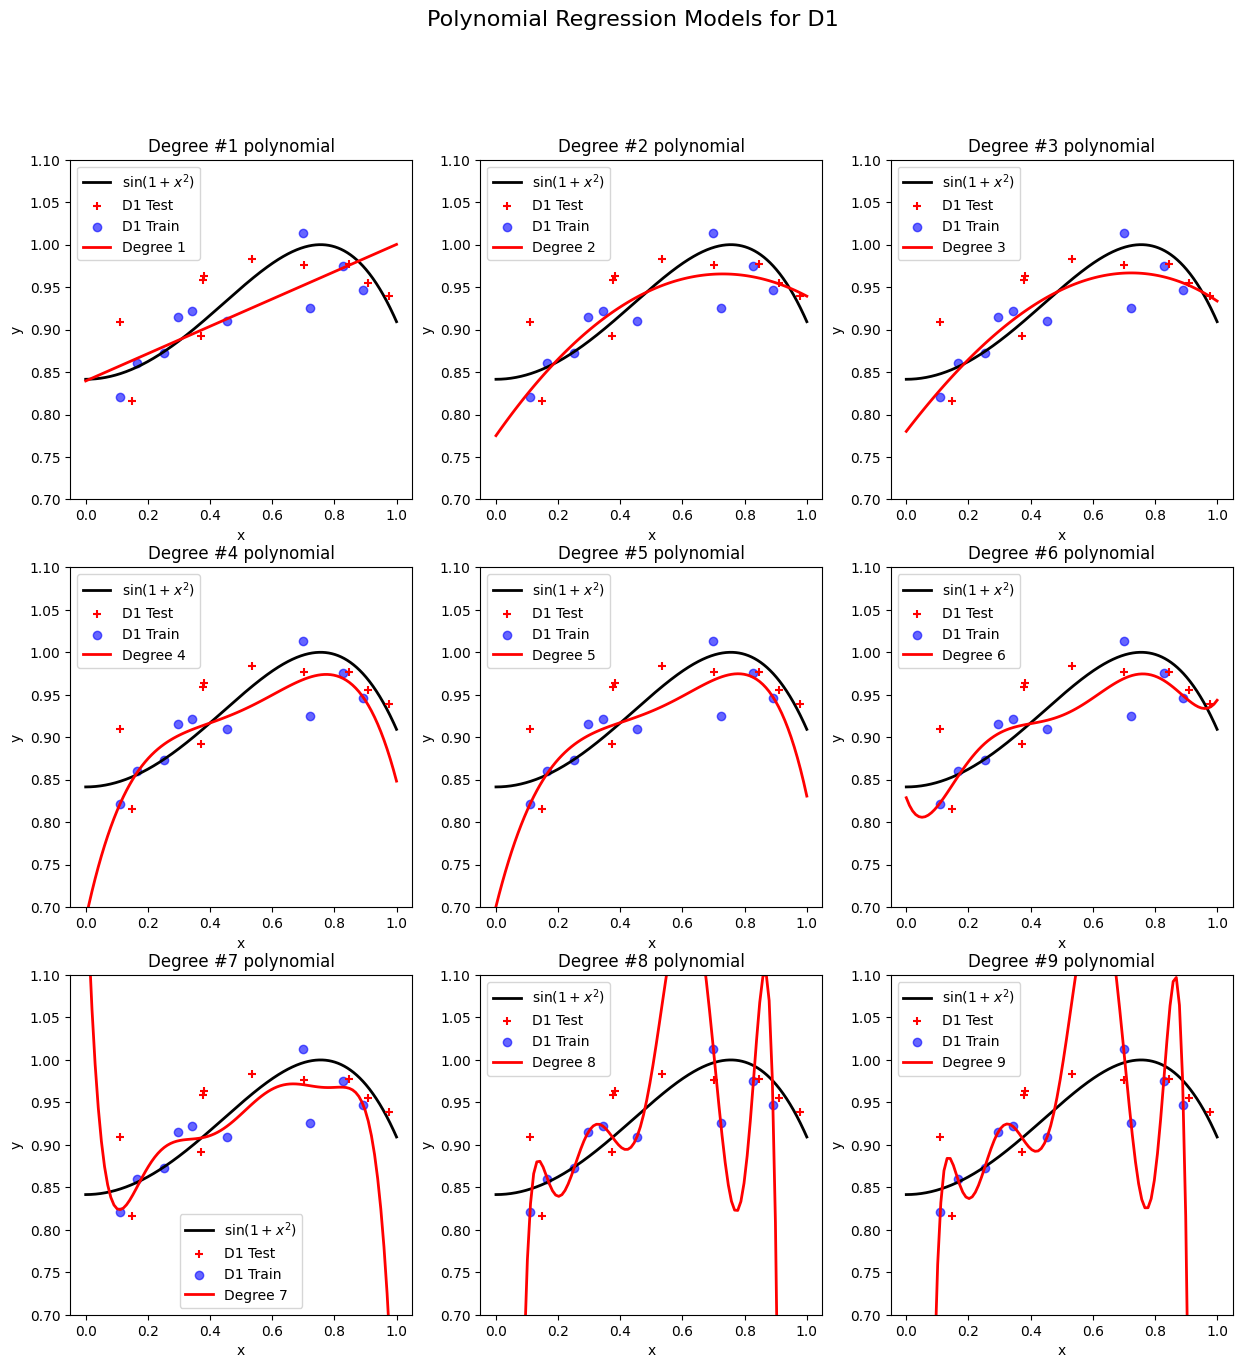

In [195]:
D1_X_poly_list = [pf.fit_transform(D1_X_train) for pf in pf_list]
D1_model_list = [LinearRegression() for _ in range (1,10)] 

for model, X_poly, in zip(D1_model_list, D1_X_poly_list):
    model.fit(X_poly, D1_y_train)

X_range = np.linspace(0, 1, 100).reshape(-1, 1)
X_poly_range_list = [poly.fit_transform(X_range) for poly in pf_list]

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle("Polynomial Regression Models for D1", fontsize=16)

for i, (degree, X_poly_range, model) in enumerate(zip(range(1, 10), X_poly_range_list, D1_model_list)):
    y_pred = model.predict(X_poly_range)
    ax = axs[i // 3, i % 3]
    ax.plot(X_val, y_val, color='black', label=r'$\sin(1 + x^2)$', linewidth=2)
    ax.scatter(D1_X_test, D1_y_test, color='red', marker='+', label='D1 Test', zorder=5)
    ax.scatter(D1_X_train, D1_y_train, color='blue', label='D1 Train', alpha=0.6)
    ax.plot(X_range, y_pred, color='red', label=f'Degree {degree}', linewidth=2)
    ax.set_title(f'Degree #{i+1} polynomial')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_ylim(0.7, 1.1)
    ax.legend()

plt.show()

In [196]:
D1_Ein_list = []
D1_Eout_list = []

D1_X_poly_test_list = [poly.fit_transform(D1_X_test) for poly in pf_list]

for model, X_poly_train, X_poly_test in zip(D1_model_list, D1_X_poly_list, D1_X_poly_test_list):
    y_train_pred = model.predict(X_poly_train)
    E_in = mean_squared_error(D1_y_train, y_train_pred)
    D1_Ein_list.append(E_in)
    y_test_pred = model.predict(X_poly_test)
    E_out = mean_squared_error(D1_y_test, y_test_pred)
    D1_Eout_list.append(E_out)

print(f"According to the graphs above:")
for degree, E_in, E_out in zip(range(1, 10), D1_Ein_list, D1_Eout_list):
    print(f"Degree #{degree}: E_in - {E_in:.4f} | E_out - {E_out:.4f}")

According to the graphs above:
Degree #1: E_in - 0.0009 | E_out - 0.0020
Degree #2: E_in - 0.0006 | E_out - 0.0013
Degree #3: E_in - 0.0006 | E_out - 0.0013
Degree #4: E_in - 0.0005 | E_out - 0.0020
Degree #5: E_in - 0.0005 | E_out - 0.0022
Degree #6: E_in - 0.0005 | E_out - 0.0016
Degree #7: E_in - 0.0005 | E_out - 0.0084
Degree #8: E_in - 0.0000 | E_out - 6.7451
Degree #9: E_in - 0.0000 | E_out - 5.8209


## D1 Data table of $E_{in}$ & $E_{out}$ (N = 10)

| Degree  | $E_{in}$  | $E_{out}$  |
|---------|-----------|------------|
| **1**   | 0.0009    | 0.0020     |
| **2**   | 0.0006    | 0.0013     |
| **3**   | 0.0006    | 0.0013     |
| **4**   | 0.0005    | 0.0020     |
| **5**   | 0.0005    | 0.0022     |
| **6**   | 0.0005    | 0.0016     |
| **7**   | 0.0005    | 0.0084     |
| **8**   | 0.0000    | 6.7451     |
| **9**   | 0.0000    | 5.8209     |


### For D2 Dataset

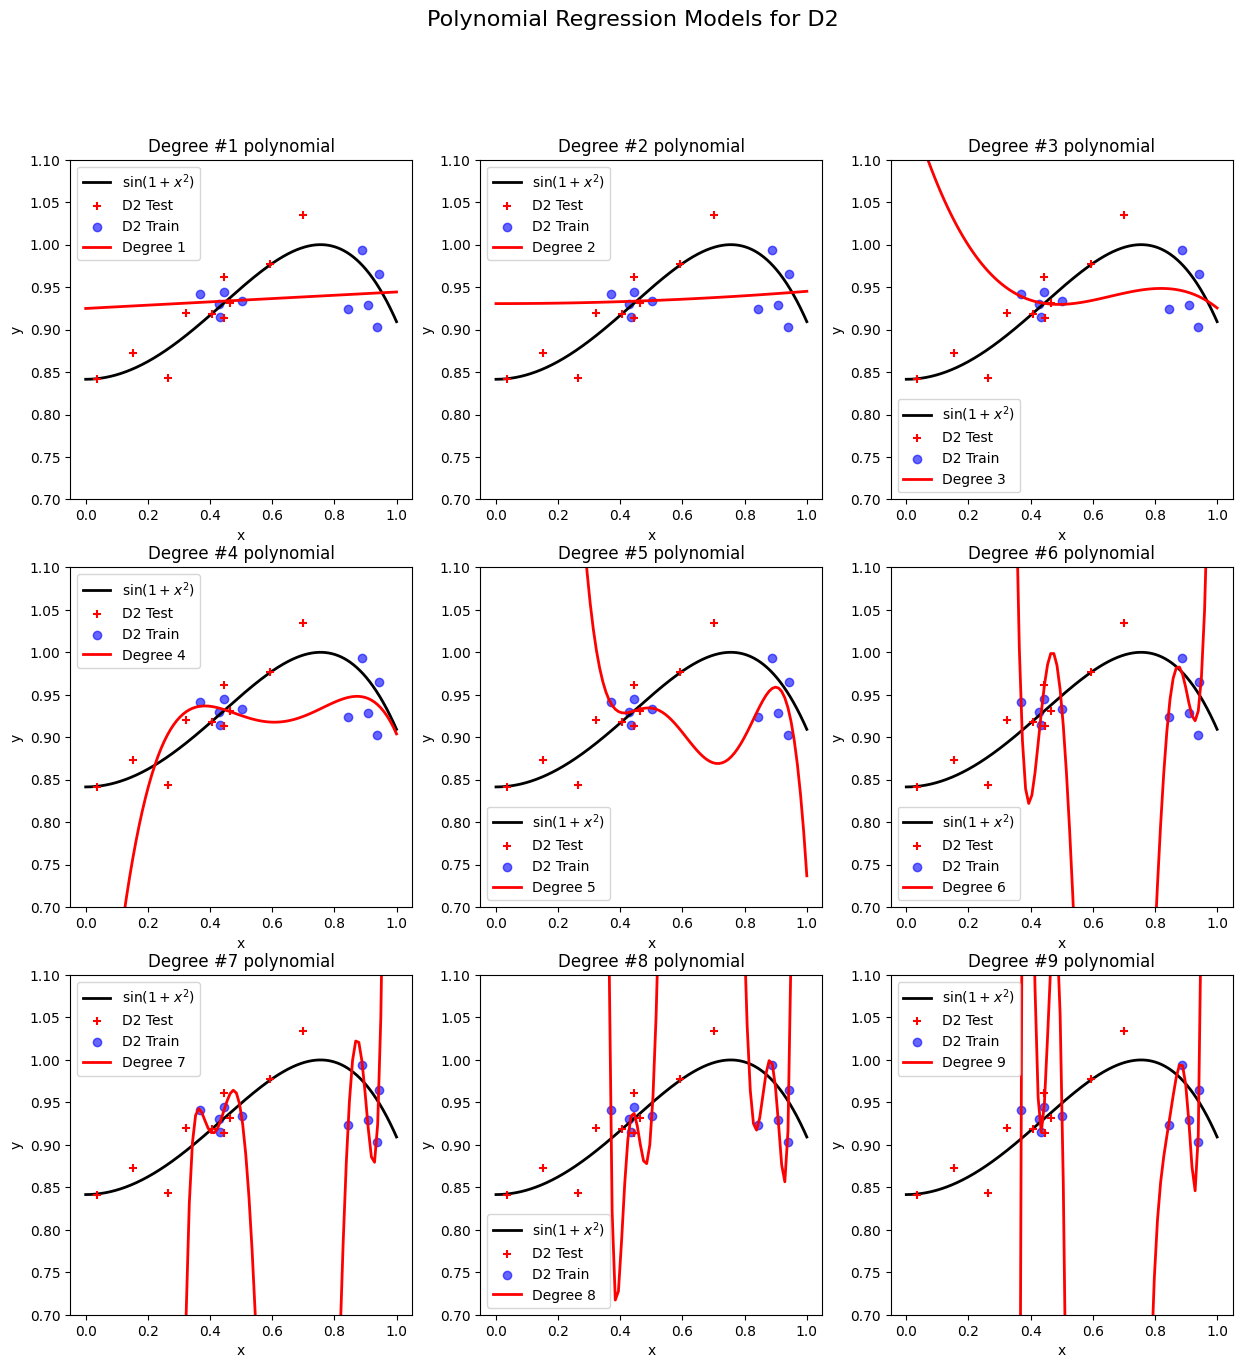

In [197]:
D2_X_poly_list = [pf.fit_transform(D2_X_train) for pf in pf_list]
D2_model_list = [LinearRegression() for _ in range (1,10)] 

for model, X_poly, in zip(D2_model_list, D2_X_poly_list):
    model.fit(X_poly, D2_y_train)

X_range = np.linspace(0, 1, 100).reshape(-1, 1)
X_poly_range_list = [poly.fit_transform(X_range) for poly in pf_list]

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle("Polynomial Regression Models for D2", fontsize=16)

for i, (degree, X_poly_range, model) in enumerate(zip(range(1, 10), X_poly_range_list, D2_model_list)):
    y_pred = model.predict(X_poly_range)
    ax = axs[i // 3, i % 3]
    ax.plot(X_val, y_val, color='black', label=r'$\sin(1 + x^2)$', linewidth=2)
    ax.scatter(D2_X_test, D2_y_test, color='red', marker='+', label='D2 Test', zorder=5)
    ax.scatter(D2_X_train, D2_y_train, color='blue', label='D2 Train', alpha=0.6)
    ax.plot(X_range, y_pred, color='red', label=f'Degree {degree}', linewidth=2)
    ax.set_title(f'Degree #{i+1} polynomial')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_ylim(0.7, 1.1)
    ax.legend()

plt.show()

In [198]:
D2_Ein_list = []
D2_Eout_list = []

D2_X_poly_test_list = [poly.fit_transform(D2_X_test) for poly in pf_list]

for model, X_poly_train, X_poly_test in zip(D2_model_list, D2_X_poly_list, D2_X_poly_test_list):
    y_train_pred = model.predict(X_poly_train)
    E_in = mean_squared_error(D2_y_train, y_train_pred)
    D2_Ein_list.append(E_in)
    y_test_pred = model.predict(X_poly_test)
    E_out = mean_squared_error(D2_y_test, y_test_pred)
    D2_Eout_list.append(E_out)

print(f"According to the graphs above:")
for degree, E_in, E_out in zip(range(1, 10), D2_Ein_list, D2_Eout_list):
    print(f"Degree #{degree}: E_in - {E_in:.4f} | E_out - {E_out:.4f}")

According to the graphs above:
Degree #1: E_in - 0.0006 | E_out - 0.0030
Degree #2: E_in - 0.0006 | E_out - 0.0032
Degree #3: E_in - 0.0006 | E_out - 0.0140
Degree #4: E_in - 0.0006 | E_out - 0.0242
Degree #5: E_in - 0.0005 | E_out - 5.3157
Degree #6: E_in - 0.0003 | E_out - 10911.9512
Degree #7: E_in - 0.0001 | E_out - 23384.8387
Degree #8: E_in - 0.0001 | E_out - 7068178.3988
Degree #9: E_in - 0.0000 | E_out - 303076577.2813


## D2 Data table of $E_{in}$ & $E_{out}$ (N = 10)

| Degree  | $E_{in}$  |   $E_{out}$    |
|---------|-----------|----------------|
| **1**   | 0.0006    | 0.0030         |
| **2**   | 0.0006    | 0.0032         |
| **3**   | 0.0006    | 0.0140         |
| **4**   | 0.0006    | 0.0242         |
| **5**   | 0.0005    | 5.3157         |
| **6**   | 0.0003    | 10911.9512     |
| **7**   | 0.0001    | 23384.8387     |
| **8**   | 0.0001    | 7068178.3988   |
| **9**   | 0.0000    | 303076577.2813 |


### For D3 Dataset

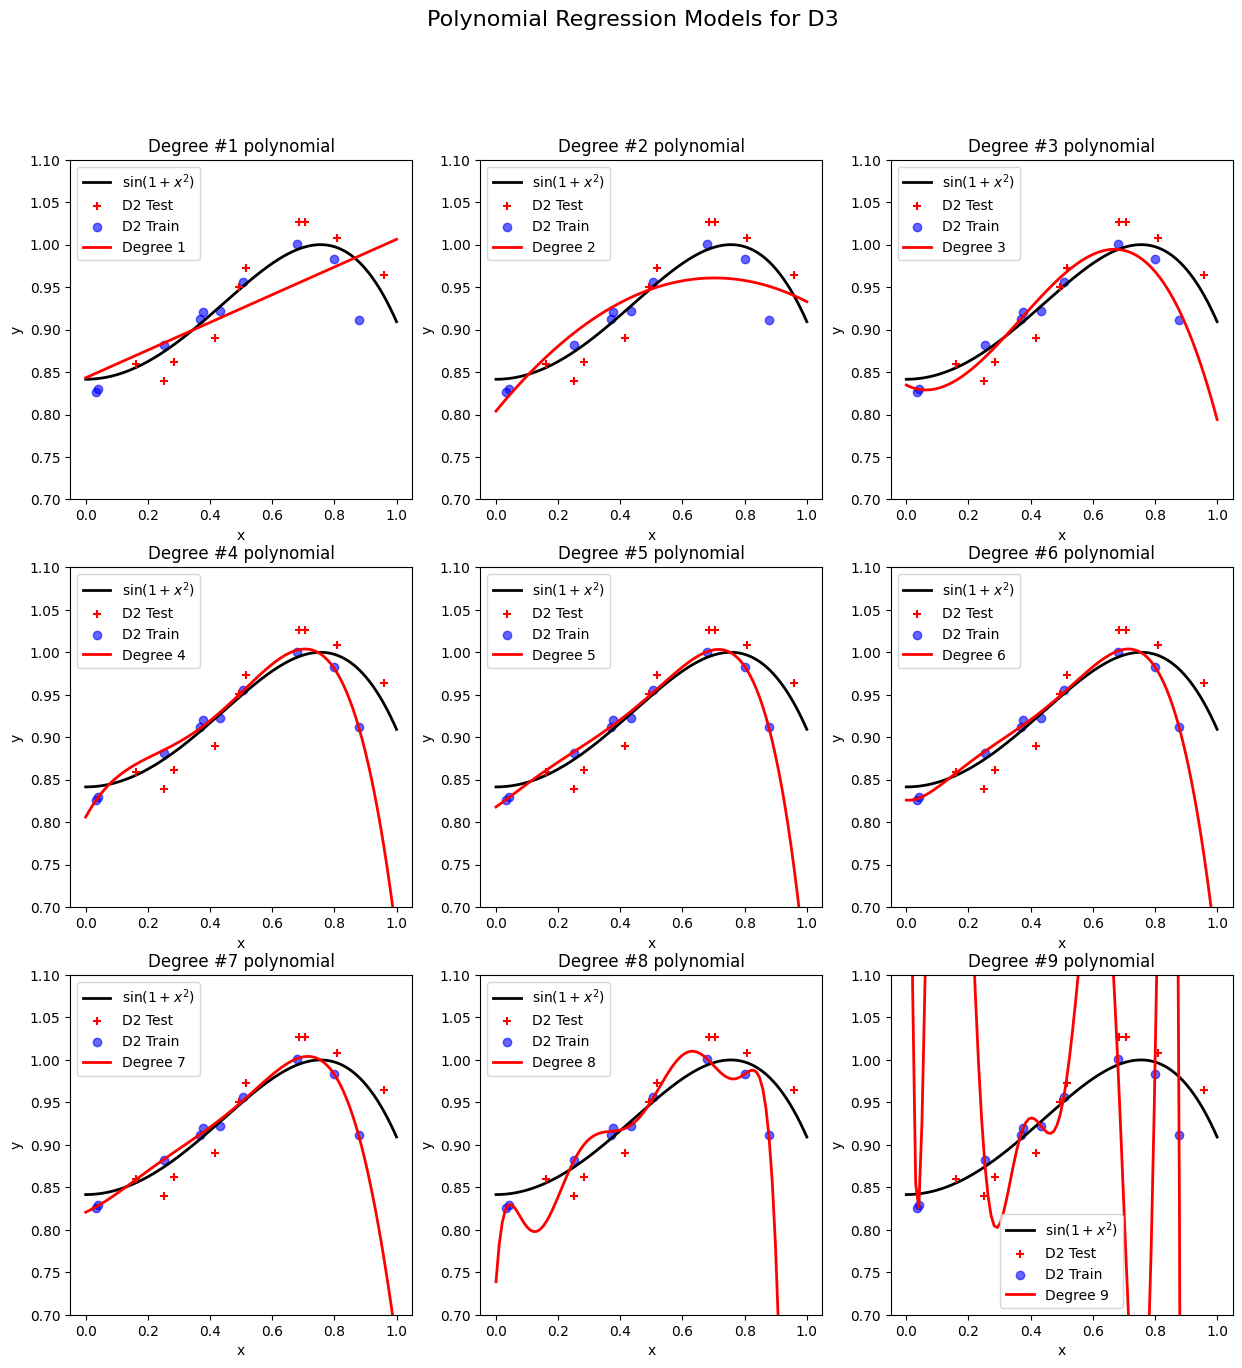

In [199]:
D3_X_poly_list = [pf.fit_transform(D3_X_train) for pf in pf_list]
D3_model_list = [LinearRegression() for _ in range (1,10)] 

for model, X_poly, in zip(D3_model_list, D3_X_poly_list):
    model.fit(X_poly, D3_y_train)

X_range = np.linspace(0, 1, 100).reshape(-1, 1)
X_poly_range_list = [poly.fit_transform(X_range) for poly in pf_list]

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle("Polynomial Regression Models for D3", fontsize=16)

for i, (degree, X_poly_range, model) in enumerate(zip(range(1, 10), X_poly_range_list, D3_model_list)):
    y_pred = model.predict(X_poly_range)
    ax = axs[i // 3, i % 3]
    ax.plot(X_val, y_val, color='black', label=r'$\sin(1 + x^2)$', linewidth=2)
    ax.scatter(D3_X_test, D3_y_test, color='red', marker='+', label='D2 Test', zorder=5)
    ax.scatter(D3_X_train, D3_y_train, color='blue', label='D2 Train', alpha=0.6)
    ax.plot(X_range, y_pred, color='red', label=f'Degree {degree}', linewidth=2)
    ax.set_title(f'Degree #{i+1} polynomial')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_ylim(0.7, 1.1)
    ax.legend()

plt.show()

In [200]:
D3_Ein_list = []
D3_Eout_list = []

D3_X_poly_test_list = [poly.fit_transform(D3_X_test) for poly in pf_list]

for model, X_poly_train, X_poly_test in zip(D3_model_list, D3_X_poly_list, D3_X_poly_test_list):
    y_train_pred = model.predict(X_poly_train)
    E_in = mean_squared_error(D3_y_train, y_train_pred)
    D3_Ein_list.append(E_in)
    y_test_pred = model.predict(X_poly_test)
    E_out = mean_squared_error(D3_y_test, y_test_pred)
    D3_Eout_list.append(E_out)

print(f"According to the graphs above:")
for degree, E_in, E_out in zip(range(1, 10), D3_Ein_list, D3_Eout_list):
    print(f"Degree #{degree}: E_in - {E_in:.4f} | E_out - {E_out:.4f}")

According to the graphs above:
Degree #1: E_in - 0.0010 | E_out - 0.0018
Degree #2: E_in - 0.0005 | E_out - 0.0020
Degree #3: E_in - 0.0001 | E_out - 0.0021
Degree #4: E_in - 0.0000 | E_out - 0.0043
Degree #5: E_in - 0.0000 | E_out - 0.0054
Degree #6: E_in - 0.0000 | E_out - 0.0049
Degree #7: E_in - 0.0000 | E_out - 0.0045
Degree #8: E_in - 0.0000 | E_out - 0.2039
Degree #9: E_in - 0.0000 | E_out - 189.5608


## D3 Data table of $E_{in}$ & $E_{out}$ (N = 10)

| Degree  | $E_{in}$  |   $E_{out}$    |
|---------|-----------|----------------|
| **1**   | 0.0010    | 0.0018         |
| **2**   | 0.0005    | 0.0020         |
| **3**   | 0.0001    | 0.0021         |
| **4**   | 0.0000    | 0.0043         |
| **5**   | 0.0000    | 0.0054         |
| **6**   | 0.0000    | 0.0049         |
| **7**   | 0.0000    | 0.0045         |
| **8**   | 0.0000    | 0.2039         |
| **9**   | 0.0000    | 189.5608       |


# Experiment 2 with N = 100

In [201]:
# Create datasets for D1, D2 and D3 by randomizing with N = 100
N = 100

D1_X_train, D1_y_train, D1_X_test, D1_y_test = dataset_randomize(N)
D2_X_train, D2_y_train, D2_X_test, D2_y_test = dataset_randomize(N)
D3_X_train, D3_y_train, D3_X_test, D3_y_test = dataset_randomize(N)

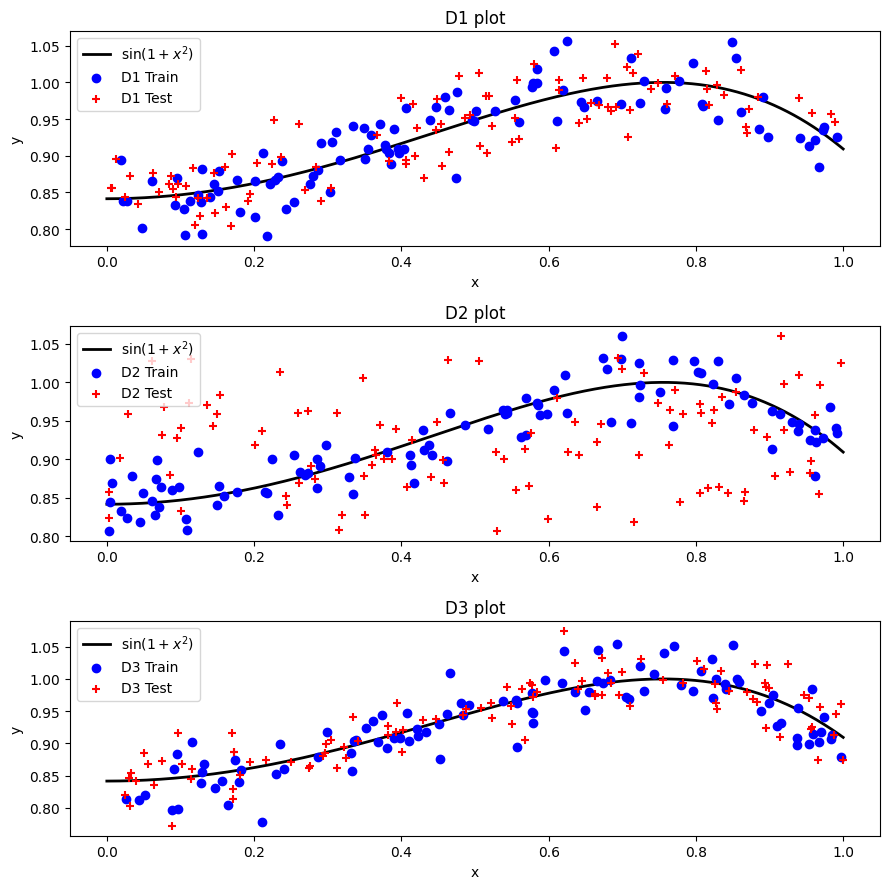

In [202]:
X_val = np.linspace(0, 1, 1000)
y_val = target_func(X_val)
plt.figure(figsize=(9, 9))

# D1
plt.subplot(3, 1, 1)
plt.plot(X_val, y_val, color='black', label=r'$\sin(1 + x^2)$', linewidth=2)  
plt.scatter(D1_X_train, D1_y_train, color='blue', label='D1 Train', zorder=5)
plt.scatter(D1_X_test, D1_y_test, color='red', marker='+', label='D1 Test', zorder=5)
plt.title('D1 plot')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# D2
plt.subplot(3, 1, 2)
plt.plot(X_val, y_val, color='black', label=r'$\sin(1 + x^2)$', linewidth=2)  
plt.scatter(D2_X_train, D2_y_train, color='blue', label='D2 Train', zorder=5)
plt.scatter(D2_X_test, D2_y_train, color='red', marker='+', label='D2 Test', zorder=5)
plt.title('D2 plot')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# D3
plt.subplot(3, 1, 3)
plt.plot(X_val, y_val, color='black', label=r'$\sin(1 + x^2)$', linewidth=2)  
plt.scatter(D3_X_train, D3_y_train, color='blue', label='D3 Train', zorder=5)
plt.scatter(D3_X_test, D3_y_test, color='red', marker='+', label='D3 Test', zorder=5)
plt.title('D3 plot')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

### For D1 Dataset

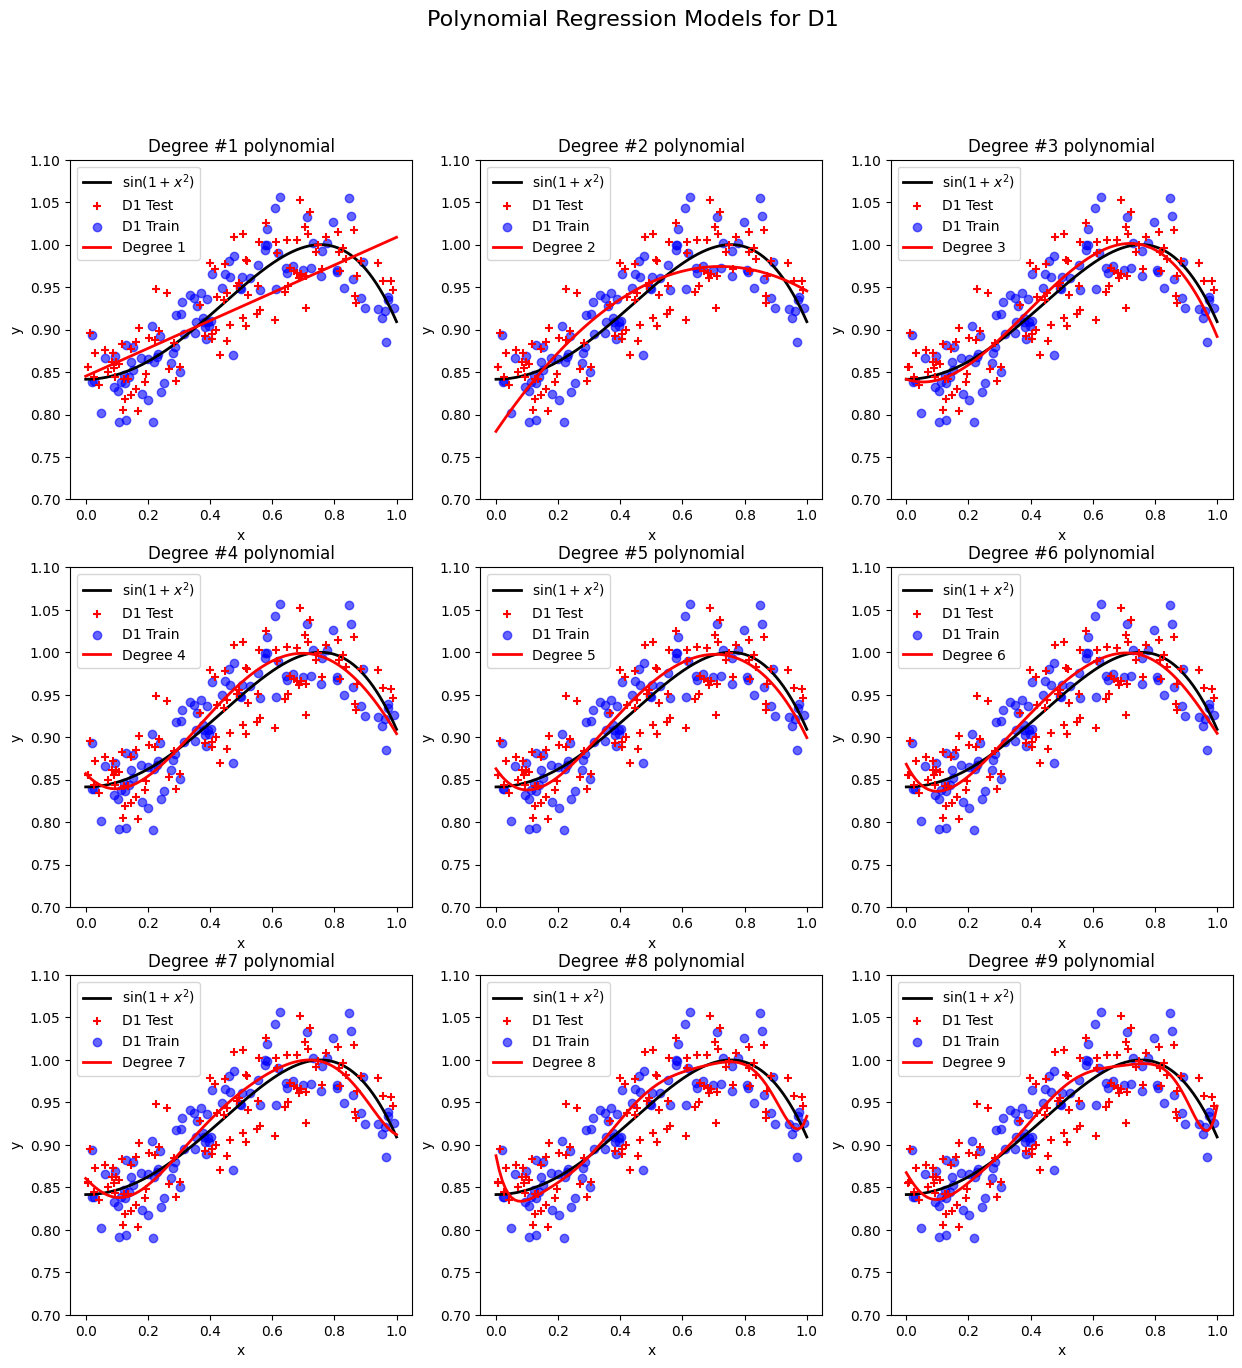

In [203]:
D1_X_poly_list = [pf.fit_transform(D1_X_train) for pf in pf_list]
D1_model_list = [LinearRegression() for _ in range (1,10)] 

for model, X_poly, in zip(D1_model_list, D1_X_poly_list):
    model.fit(X_poly, D1_y_train)

X_range = np.linspace(0, 1, 100).reshape(-1, 1)
X_poly_range_list = [poly.fit_transform(X_range) for poly in pf_list]

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle("Polynomial Regression Models for D1", fontsize=16)

for i, (degree, X_poly_range, model) in enumerate(zip(range(1, 10), X_poly_range_list, D1_model_list)):
    y_pred = model.predict(X_poly_range)
    ax = axs[i // 3, i % 3]
    ax.plot(X_val, y_val, color='black', label=r'$\sin(1 + x^2)$', linewidth=2)
    ax.scatter(D1_X_test, D1_y_test, color='red', marker='+', label='D1 Test', zorder=5)
    ax.scatter(D1_X_train, D1_y_train, color='blue', label='D1 Train', alpha=0.6)
    ax.plot(X_range, y_pred, color='red', label=f'Degree {degree}', linewidth=2)
    ax.set_title(f'Degree #{i+1} polynomial')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_ylim(0.7, 1.1)
    ax.legend()

plt.show()

In [204]:
D1_Ein_list = []
D1_Eout_list = []

D1_X_poly_test_list = [poly.fit_transform(D1_X_test) for poly in pf_list]

for model, X_poly_train, X_poly_test in zip(D1_model_list, D1_X_poly_list, D1_X_poly_test_list):
    y_train_pred = model.predict(X_poly_train)
    E_in = mean_squared_error(D1_y_train, y_train_pred)
    D1_Ein_list.append(E_in)
    y_test_pred = model.predict(X_poly_test)
    E_out = mean_squared_error(D1_y_test, y_test_pred)
    D1_Eout_list.append(E_out)

print(f"According to the graphs above:")
for degree, E_in, E_out in zip(range(1, 10), D1_Ein_list, D1_Eout_list):
    print(f"Degree #{degree}: E_in - {E_in:.4f} | E_out - {E_out:.4f}")

According to the graphs above:
Degree #1: E_in - 0.0020 | E_out - 0.0015
Degree #2: E_in - 0.0012 | E_out - 0.0015
Degree #3: E_in - 0.0009 | E_out - 0.0012
Degree #4: E_in - 0.0008 | E_out - 0.0012
Degree #5: E_in - 0.0008 | E_out - 0.0012
Degree #6: E_in - 0.0008 | E_out - 0.0012
Degree #7: E_in - 0.0008 | E_out - 0.0012
Degree #8: E_in - 0.0008 | E_out - 0.0012
Degree #9: E_in - 0.0008 | E_out - 0.0012


## D1 Data table of $E_{in}$ & $E_{out}$ (N = 100)

| Degree  | $E_{in}$  | $E_{out}$  |
|---------|-----------|------------|
| **1**   | 0.0020    | 0.0015     |
| **2**   | 0.0012    | 0.0015     |
| **3**   | 0.0009    | 0.0012     |
| **4**   | 0.0008    | 0.0012     |
| **5**   | 0.0008    | 0.0012     |
| **6**   | 0.0008    | 0.0012     |
| **7**   | 0.0008    | 0.0012     |
| **8**   | 0.0008    | 0.0012     |
| **9**   | 0.0008    | 0.0012     |


### For D2 Dataset

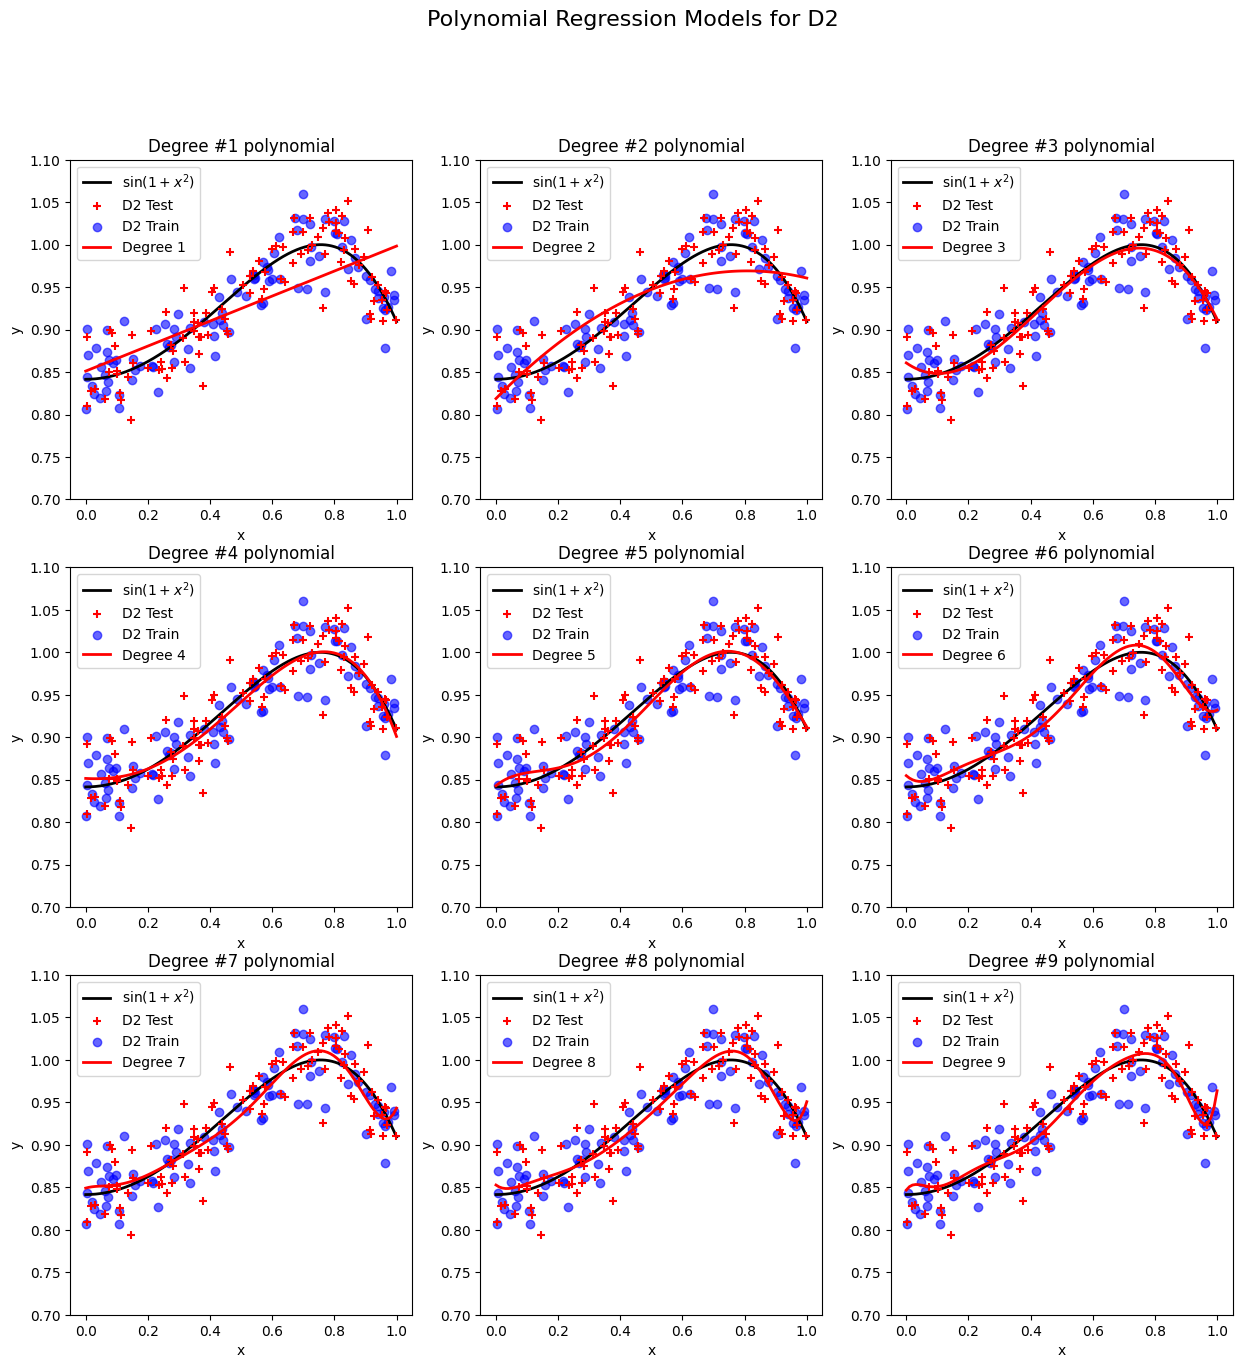

In [205]:
D2_X_poly_list = [pf.fit_transform(D2_X_train) for pf in pf_list]
D2_model_list = [LinearRegression() for _ in range (1,10)] 

for model, X_poly, in zip(D2_model_list, D2_X_poly_list):
    model.fit(X_poly, D2_y_train)

X_range = np.linspace(0, 1, 100).reshape(-1, 1)
X_poly_range_list = [poly.fit_transform(X_range) for poly in pf_list]

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle("Polynomial Regression Models for D2", fontsize=16)

for i, (degree, X_poly_range, model) in enumerate(zip(range(1, 10), X_poly_range_list, D2_model_list)):
    y_pred = model.predict(X_poly_range)
    ax = axs[i // 3, i % 3]
    ax.plot(X_val, y_val, color='black', label=r'$\sin(1 + x^2)$', linewidth=2)
    ax.scatter(D2_X_test, D2_y_test, color='red', marker='+', label='D2 Test', zorder=5)
    ax.scatter(D2_X_train, D2_y_train, color='blue', label='D2 Train', alpha=0.6)
    ax.plot(X_range, y_pred, color='red', label=f'Degree {degree}', linewidth=2)
    ax.set_title(f'Degree #{i+1} polynomial')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_ylim(0.7, 1.1)
    ax.legend()

plt.show()

In [206]:
D2_Ein_list = []
D2_Eout_list = []

D2_X_poly_test_list = [poly.fit_transform(D2_X_test) for poly in pf_list]

for model, X_poly_train, X_poly_test in zip(D2_model_list, D2_X_poly_list, D2_X_poly_test_list):
    y_train_pred = model.predict(X_poly_train)
    E_in = mean_squared_error(D2_y_train, y_train_pred)
    D2_Ein_list.append(E_in)
    y_test_pred = model.predict(X_poly_test)
    E_out = mean_squared_error(D2_y_test, y_test_pred)
    D2_Eout_list.append(E_out)

print(f"According to the graphs above:")
for degree, E_in, E_out in zip(range(1, 10), D2_Ein_list, D2_Eout_list):
    print(f"Degree #{degree}: E_in - {E_in:.4f} | E_out - {E_out:.4f}")

According to the graphs above:
Degree #1: E_in - 0.0015 | E_out - 0.0018
Degree #2: E_in - 0.0012 | E_out - 0.0014
Degree #3: E_in - 0.0007 | E_out - 0.0008
Degree #4: E_in - 0.0007 | E_out - 0.0008
Degree #5: E_in - 0.0007 | E_out - 0.0008
Degree #6: E_in - 0.0006 | E_out - 0.0008
Degree #7: E_in - 0.0006 | E_out - 0.0008
Degree #8: E_in - 0.0006 | E_out - 0.0008
Degree #9: E_in - 0.0006 | E_out - 0.0008


## D2 Data table of $E_{in}$ & $E_{out}$ (N = 100)

| Degree  | $E_{in}$  |   $E_{out}$    |
|---------|-----------|----------------|
| **1**   | 0.0015    | 0.0018         |
| **2**   | 0.0012    | 0.0014         |
| **3**   | 0.0007    | 0.0008         |
| **4**   | 0.0007    | 0.0008         |
| **5**   | 0.0007    | 0.0008         |
| **6**   | 0.0006    | 0.0008         |
| **7**   | 0.0006    | 0.0008         |
| **8**   | 0.0006    | 0.0008         |
| **9**   | 0.0006    | 0.0008         |


### For D3 Dataset

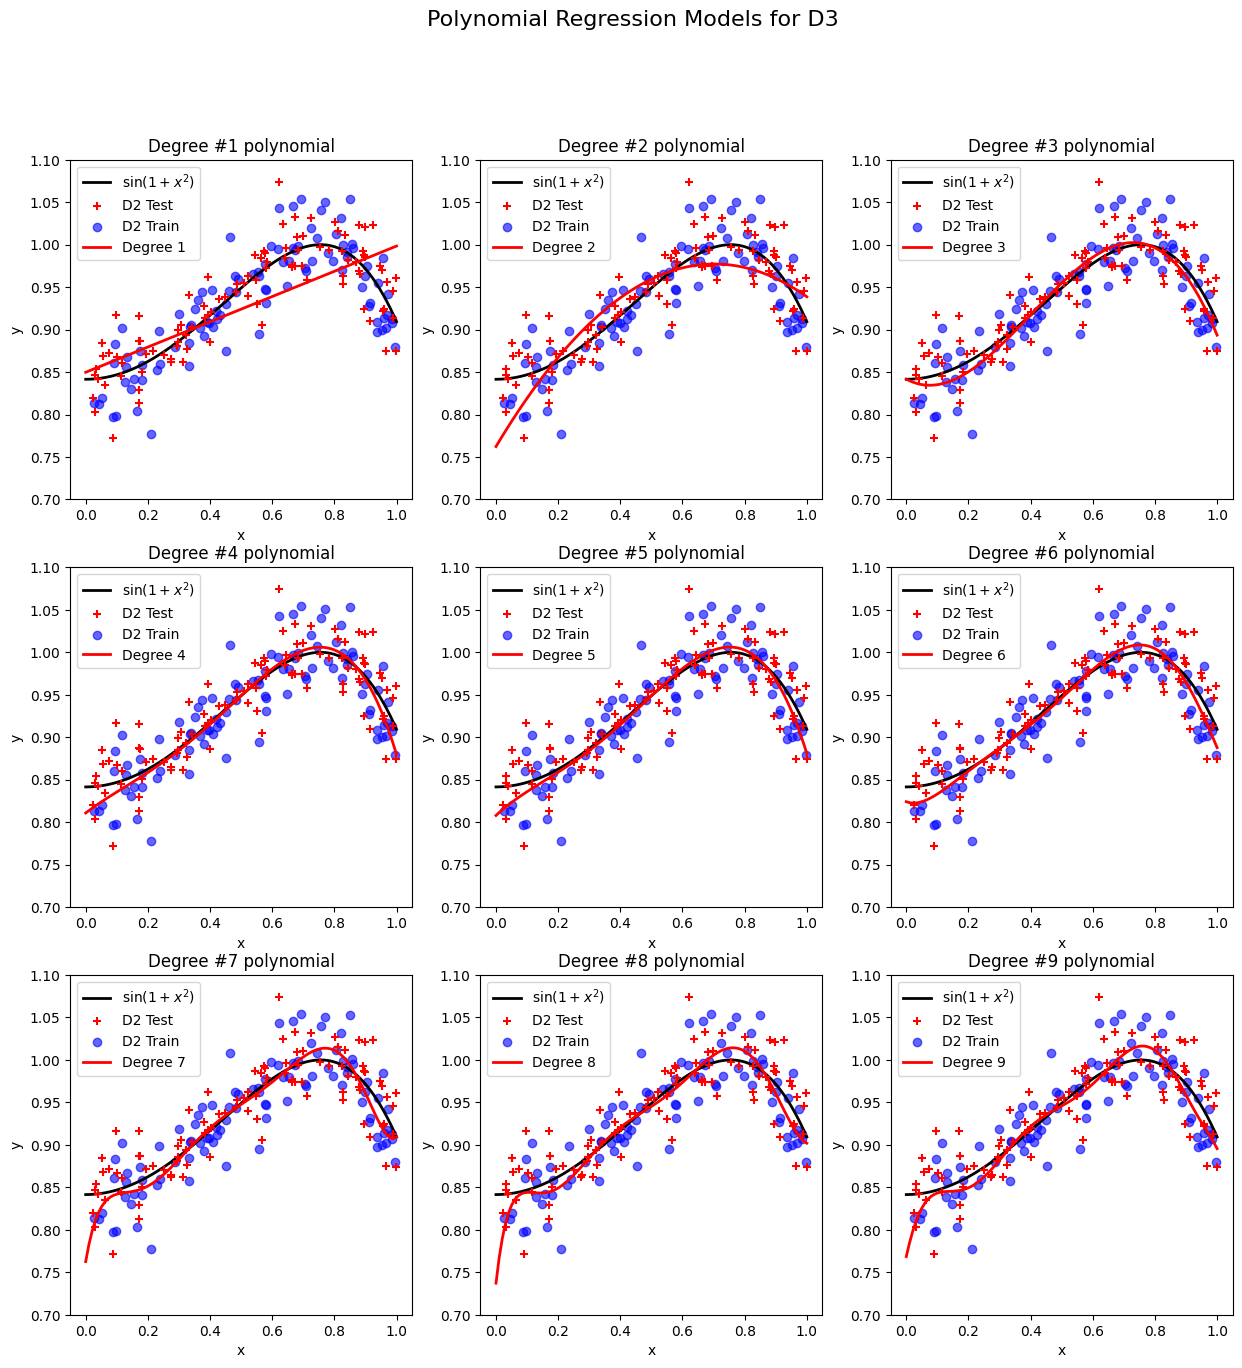

In [207]:
D3_X_poly_list = [pf.fit_transform(D3_X_train) for pf in pf_list]
D3_model_list = [LinearRegression() for _ in range (1,10)] 

for model, X_poly, in zip(D3_model_list, D3_X_poly_list):
    model.fit(X_poly, D3_y_train)

X_range = np.linspace(0, 1, 100).reshape(-1, 1)
X_poly_range_list = [poly.fit_transform(X_range) for poly in pf_list]

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle("Polynomial Regression Models for D3", fontsize=16)

for i, (degree, X_poly_range, model) in enumerate(zip(range(1, 10), X_poly_range_list, D3_model_list)):
    y_pred = model.predict(X_poly_range)
    ax = axs[i // 3, i % 3]
    ax.plot(X_val, y_val, color='black', label=r'$\sin(1 + x^2)$', linewidth=2)
    ax.scatter(D3_X_test, D3_y_test, color='red', marker='+', label='D2 Test', zorder=5)
    ax.scatter(D3_X_train, D3_y_train, color='blue', label='D2 Train', alpha=0.6)
    ax.plot(X_range, y_pred, color='red', label=f'Degree {degree}', linewidth=2)
    ax.set_title(f'Degree #{i+1} polynomial')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_ylim(0.7, 1.1)
    ax.legend()

plt.show()

In [208]:
D3_Ein_list = []
D3_Eout_list = []

D3_X_poly_test_list = [poly.fit_transform(D3_X_test) for poly in pf_list]

for model, X_poly_train, X_poly_test in zip(D3_model_list, D3_X_poly_list, D3_X_poly_test_list):
    y_train_pred = model.predict(X_poly_train)
    E_in = mean_squared_error(D3_y_train, y_train_pred)
    D3_Ein_list.append(E_in)
    y_test_pred = model.predict(X_poly_test)
    E_out = mean_squared_error(D3_y_test, y_test_pred)
    D3_Eout_list.append(E_out)

print(f"According to the graphs above:")
for degree, E_in, E_out in zip(range(1, 10), D3_Ein_list, D3_Eout_list):
    print(f"Degree #{degree}: E_in - {E_in:.4f} | E_out - {E_out:.4f}")

According to the graphs above:
Degree #1: E_in - 0.0023 | E_out - 0.0018
Degree #2: E_in - 0.0013 | E_out - 0.0014
Degree #3: E_in - 0.0009 | E_out - 0.0010
Degree #4: E_in - 0.0008 | E_out - 0.0010
Degree #5: E_in - 0.0008 | E_out - 0.0010
Degree #6: E_in - 0.0008 | E_out - 0.0010
Degree #7: E_in - 0.0008 | E_out - 0.0010
Degree #8: E_in - 0.0008 | E_out - 0.0010
Degree #9: E_in - 0.0008 | E_out - 0.0010


## D3 Data table of $E_{in}$ & $E_{out}$ (N = 100)

| Degree  | $E_{in}$  |   $E_{out}$    |
|---------|-----------|----------------|
| **1**   | 0.0023    | 0.0018         |
| **2**   | 0.0013    | 0.0014         |
| **3**   | 0.0009    | 0.0010         |
| **4**   | 0.0008    | 0.0010         |
| **5**   | 0.0008    | 0.0010         |
| **6**   | 0.0008    | 0.0010         |
| **7**   | 0.0008    | 0.0010         |
| **8**   | 0.0008    | 0.0010         |
| **9**   | 0.0008    | 0.0010         |


# Experiment 3 with N = 1000

In [209]:
# Create datasets for D1, D2 and D3 by randomizing with N = 1000
N = 1000

D1_X_train, D1_y_train, D1_X_test, D1_y_test = dataset_randomize(N)
D2_X_train, D2_y_train, D2_X_test, D2_y_test = dataset_randomize(N)
D3_X_train, D3_y_train, D3_X_test, D3_y_test = dataset_randomize(N)

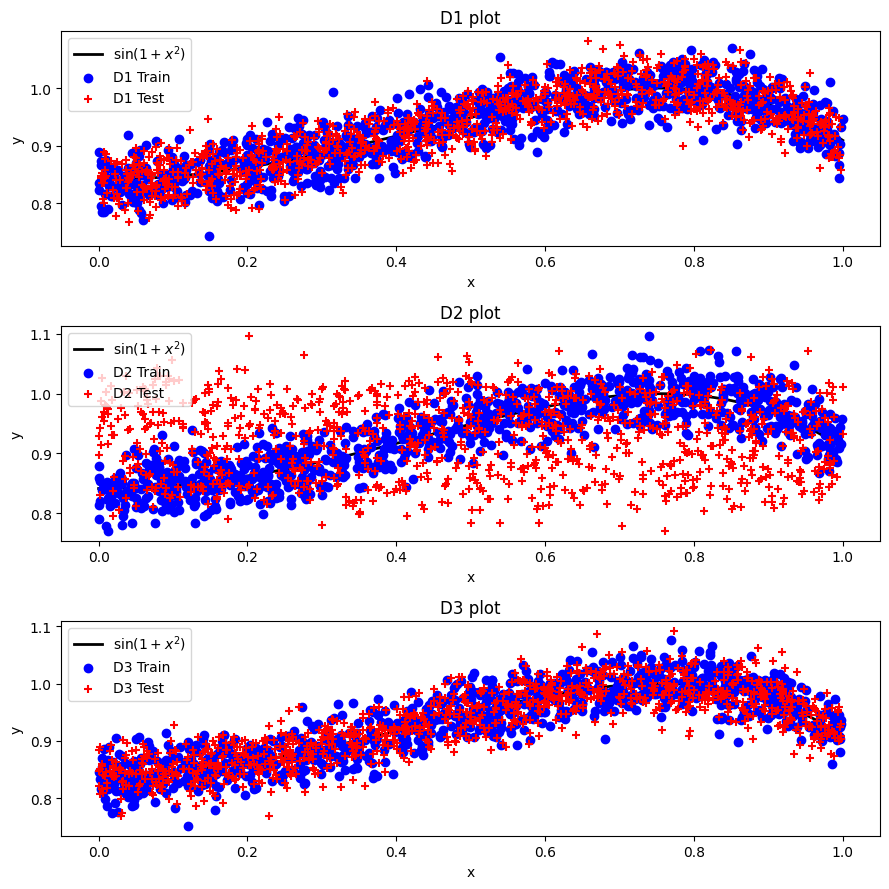

In [210]:
X_val = np.linspace(0, 1, 1000)
y_val = target_func(X_val)
plt.figure(figsize=(9, 9))

# D1
plt.subplot(3, 1, 1)
plt.plot(X_val, y_val, color='black', label=r'$\sin(1 + x^2)$', linewidth=2)  
plt.scatter(D1_X_train, D1_y_train, color='blue', label='D1 Train', zorder=5)
plt.scatter(D1_X_test, D1_y_test, color='red', marker='+', label='D1 Test', zorder=5)
plt.title('D1 plot')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# D2
plt.subplot(3, 1, 2)
plt.plot(X_val, y_val, color='black', label=r'$\sin(1 + x^2)$', linewidth=2)  
plt.scatter(D2_X_train, D2_y_train, color='blue', label='D2 Train', zorder=5)
plt.scatter(D2_X_test, D2_y_train, color='red', marker='+', label='D2 Test', zorder=5)
plt.title('D2 plot')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# D3
plt.subplot(3, 1, 3)
plt.plot(X_val, y_val, color='black', label=r'$\sin(1 + x^2)$', linewidth=2)  
plt.scatter(D3_X_train, D3_y_train, color='blue', label='D3 Train', zorder=5)
plt.scatter(D3_X_test, D3_y_test, color='red', marker='+', label='D3 Test', zorder=5)
plt.title('D3 plot')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

### For D1 Dataset

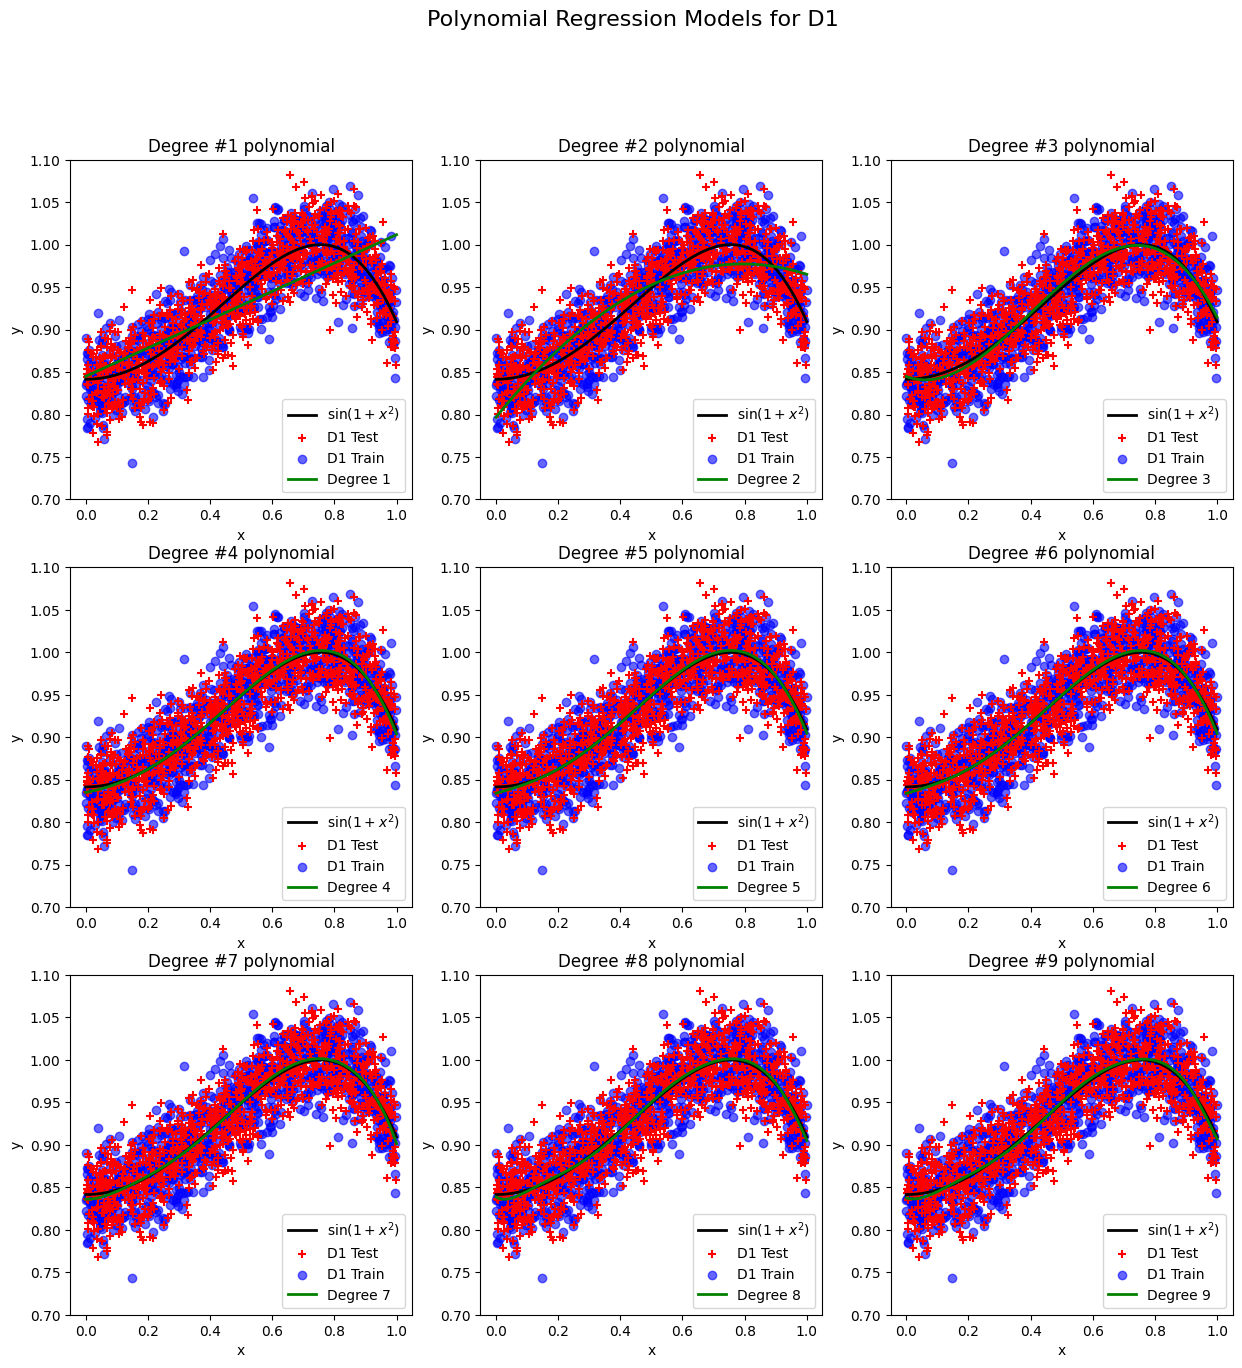

In [214]:
D1_X_poly_list = [pf.fit_transform(D1_X_train) for pf in pf_list]
D1_model_list = [LinearRegression() for _ in range (1,10)] 

for model, X_poly, in zip(D1_model_list, D1_X_poly_list):
    model.fit(X_poly, D1_y_train)

X_range = np.linspace(0, 1, 100).reshape(-1, 1)
X_poly_range_list = [poly.fit_transform(X_range) for poly in pf_list]

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle("Polynomial Regression Models for D1", fontsize=16)

for i, (degree, X_poly_range, model) in enumerate(zip(range(1, 10), X_poly_range_list, D1_model_list)):
    y_pred = model.predict(X_poly_range)
    ax = axs[i // 3, i % 3]
    ax.plot(X_val, y_val, color='black', label=r'$\sin(1 + x^2)$', linewidth=2, zorder=10)
    ax.scatter(D1_X_test, D1_y_test, color='red', marker='+', label='D1 Test', zorder=5)
    ax.scatter(D1_X_train, D1_y_train, color='blue', label='D1 Train', alpha=0.6)
    ax.plot(X_range, y_pred, color='green', label=f'Degree {degree}', linewidth=2, zorder=15)
    ax.set_title(f'Degree #{i+1} polynomial')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_ylim(0.7, 1.1)
    ax.legend()

plt.show()

In [212]:
D1_Ein_list = []
D1_Eout_list = []

D1_X_poly_test_list = [poly.fit_transform(D1_X_test) for poly in pf_list]

for model, X_poly_train, X_poly_test in zip(D1_model_list, D1_X_poly_list, D1_X_poly_test_list):
    y_train_pred = model.predict(X_poly_train)
    E_in = mean_squared_error(D1_y_train, y_train_pred)
    D1_Ein_list.append(E_in)
    y_test_pred = model.predict(X_poly_test)
    E_out = mean_squared_error(D1_y_test, y_test_pred)
    D1_Eout_list.append(E_out)

print(f"According to the graphs above:")
for degree, E_in, E_out in zip(range(1, 10), D1_Ein_list, D1_Eout_list):
    print(f"Degree #{degree}: E_in - {E_in:.4f} | E_out - {E_out:.4f}")

According to the graphs above:
Degree #1: E_in - 0.0017 | E_out - 0.0018
Degree #2: E_in - 0.0013 | E_out - 0.0013
Degree #3: E_in - 0.0009 | E_out - 0.0009
Degree #4: E_in - 0.0009 | E_out - 0.0009
Degree #5: E_in - 0.0009 | E_out - 0.0009
Degree #6: E_in - 0.0009 | E_out - 0.0009
Degree #7: E_in - 0.0009 | E_out - 0.0009
Degree #8: E_in - 0.0009 | E_out - 0.0009
Degree #9: E_in - 0.0009 | E_out - 0.0009


## D1 Data table of $E_{in}$ & $E_{out}$ (N = 1000)

| Degree  | $E_{in}$  | $E_{out}$  |
|---------|-----------|------------|
| **1**   | 0.0017    | 0.0018     |
| **2**   | 0.0013    | 0.0013     |
| **3**   | 0.0009    | 0.0009     |
| **4**   | 0.0009    | 0.0009     |
| **5**   | 0.0009    | 0.0009     |
| **6**   | 0.0009    | 0.0009     |
| **7**   | 0.0009    | 0.0009     |
| **8**   | 0.0009    | 0.0009     |
| **9**   | 0.0009    | 0.0009     |


### For D2 Dataset

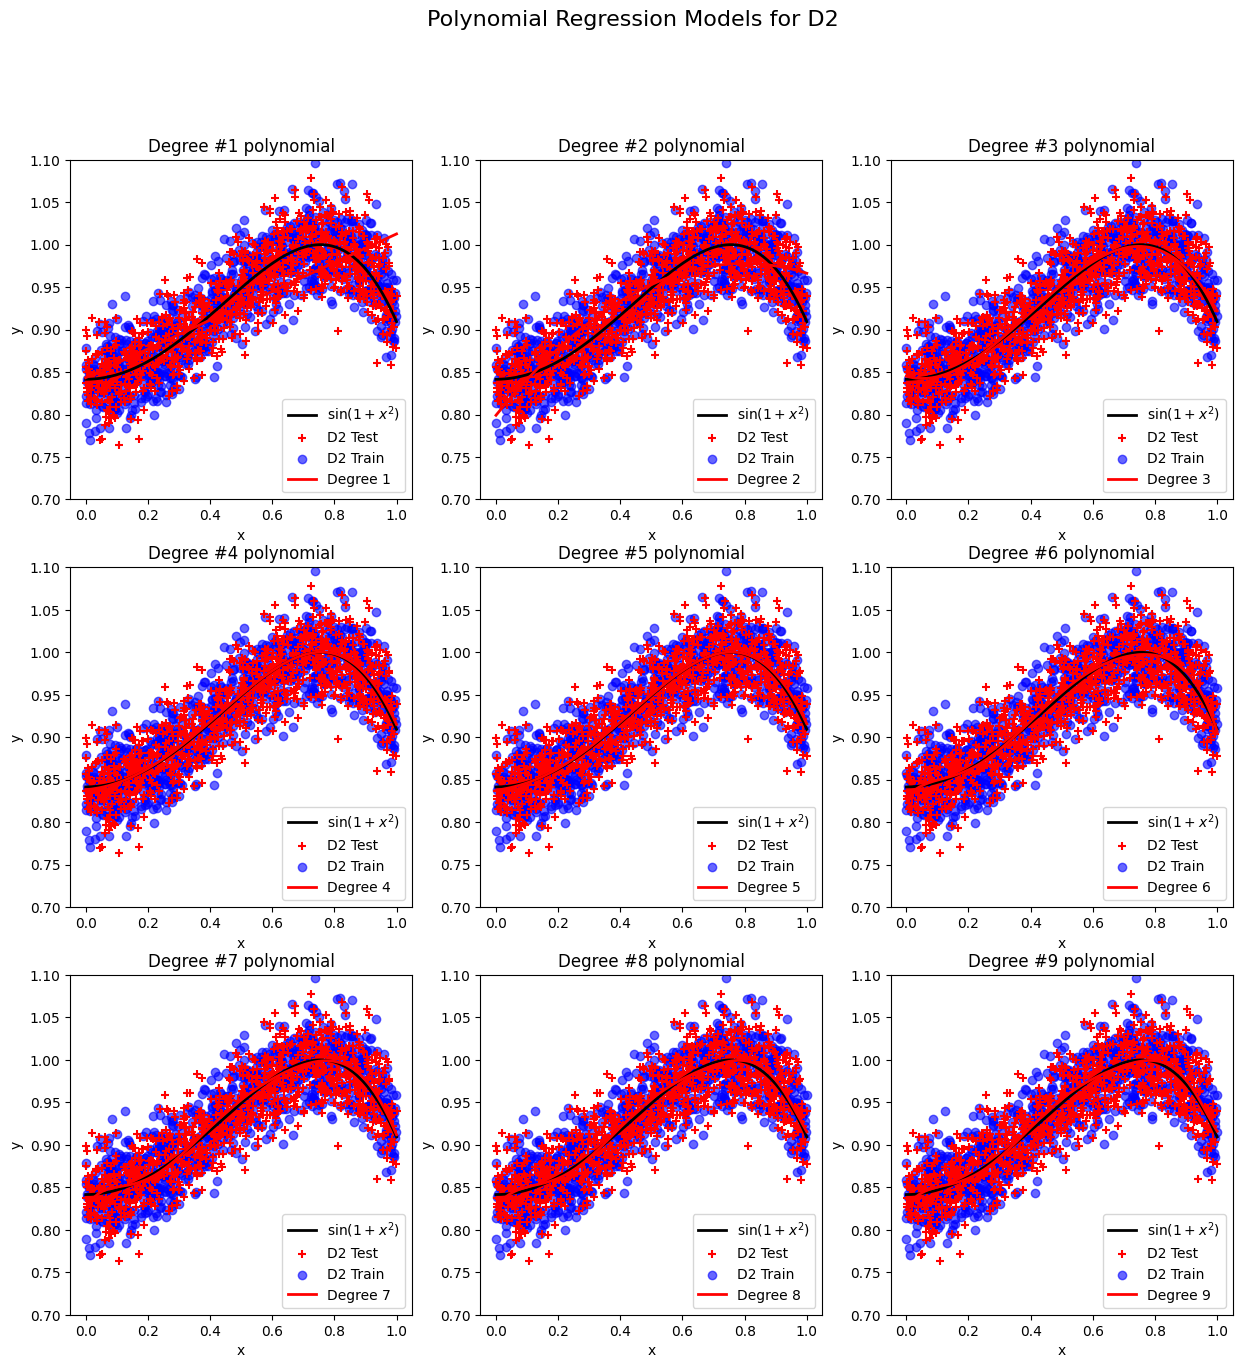

In [215]:
D2_X_poly_list = [pf.fit_transform(D2_X_train) for pf in pf_list]
D2_model_list = [LinearRegression() for _ in range (1,10)] 

for model, X_poly, in zip(D2_model_list, D2_X_poly_list):
    model.fit(X_poly, D2_y_train)

X_range = np.linspace(0, 1, 100).reshape(-1, 1)
X_poly_range_list = [poly.fit_transform(X_range) for poly in pf_list]

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle("Polynomial Regression Models for D2", fontsize=16)

for i, (degree, X_poly_range, model) in enumerate(zip(range(1, 10), X_poly_range_list, D2_model_list)):
    y_pred = model.predict(X_poly_range)
    ax = axs[i // 3, i % 3]
    ax.plot(X_val, y_val, color='black', label=r'$\sin(1 + x^2)$', linewidth=2, zorder=10)
    ax.scatter(D2_X_test, D2_y_test, color='red', marker='+', label='D2 Test', zorder=5)
    ax.scatter(D2_X_train, D2_y_train, color='blue', label='D2 Train', alpha=0.6)
    ax.plot(X_range, y_pred, color='red', label=f'Degree {degree}', linewidth=2, zorder=15)
    ax.set_title(f'Degree #{i+1} polynomial')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_ylim(0.7, 1.1)
    ax.legend()

plt.show()

In [216]:
D2_Ein_list = []
D2_Eout_list = []

D2_X_poly_test_list = [poly.fit_transform(D2_X_test) for poly in pf_list]

for model, X_poly_train, X_poly_test in zip(D2_model_list, D2_X_poly_list, D2_X_poly_test_list):
    y_train_pred = model.predict(X_poly_train)
    E_in = mean_squared_error(D2_y_train, y_train_pred)
    D2_Ein_list.append(E_in)
    y_test_pred = model.predict(X_poly_test)
    E_out = mean_squared_error(D2_y_test, y_test_pred)
    D2_Eout_list.append(E_out)

print(f"According to the graphs above:")
for degree, E_in, E_out in zip(range(1, 10), D2_Ein_list, D2_Eout_list):
    print(f"Degree #{degree}: E_in - {E_in:.4f} | E_out - {E_out:.4f}")

According to the graphs above:
Degree #1: E_in - 0.0017 | E_out - 0.0015
Degree #2: E_in - 0.0012 | E_out - 0.0011
Degree #3: E_in - 0.0009 | E_out - 0.0009
Degree #4: E_in - 0.0009 | E_out - 0.0009
Degree #5: E_in - 0.0009 | E_out - 0.0009
Degree #6: E_in - 0.0009 | E_out - 0.0009
Degree #7: E_in - 0.0009 | E_out - 0.0009
Degree #8: E_in - 0.0009 | E_out - 0.0009
Degree #9: E_in - 0.0009 | E_out - 0.0009


## D2 Data table of $E_{in}$ & $E_{out}$ (N = 1000)

| Degree  | $E_{in}$  |   $E_{out}$    |
|---------|-----------|----------------|
| **1**   | 0.0017    | 0.0015         |
| **2**   | 0.0012    | 0.0011         |
| **3**   | 0.0009    | 0.0009         |
| **4**   | 0.0009    | 0.0009         |
| **5**   | 0.0009    | 0.0009         |
| **6**   | 0.0009    | 0.0009         |
| **7**   | 0.0009    | 0.0009         |
| **8**   | 0.0009    | 0.0009         |
| **9**   | 0.0009    | 0.0009         |


### For D3 Dataset

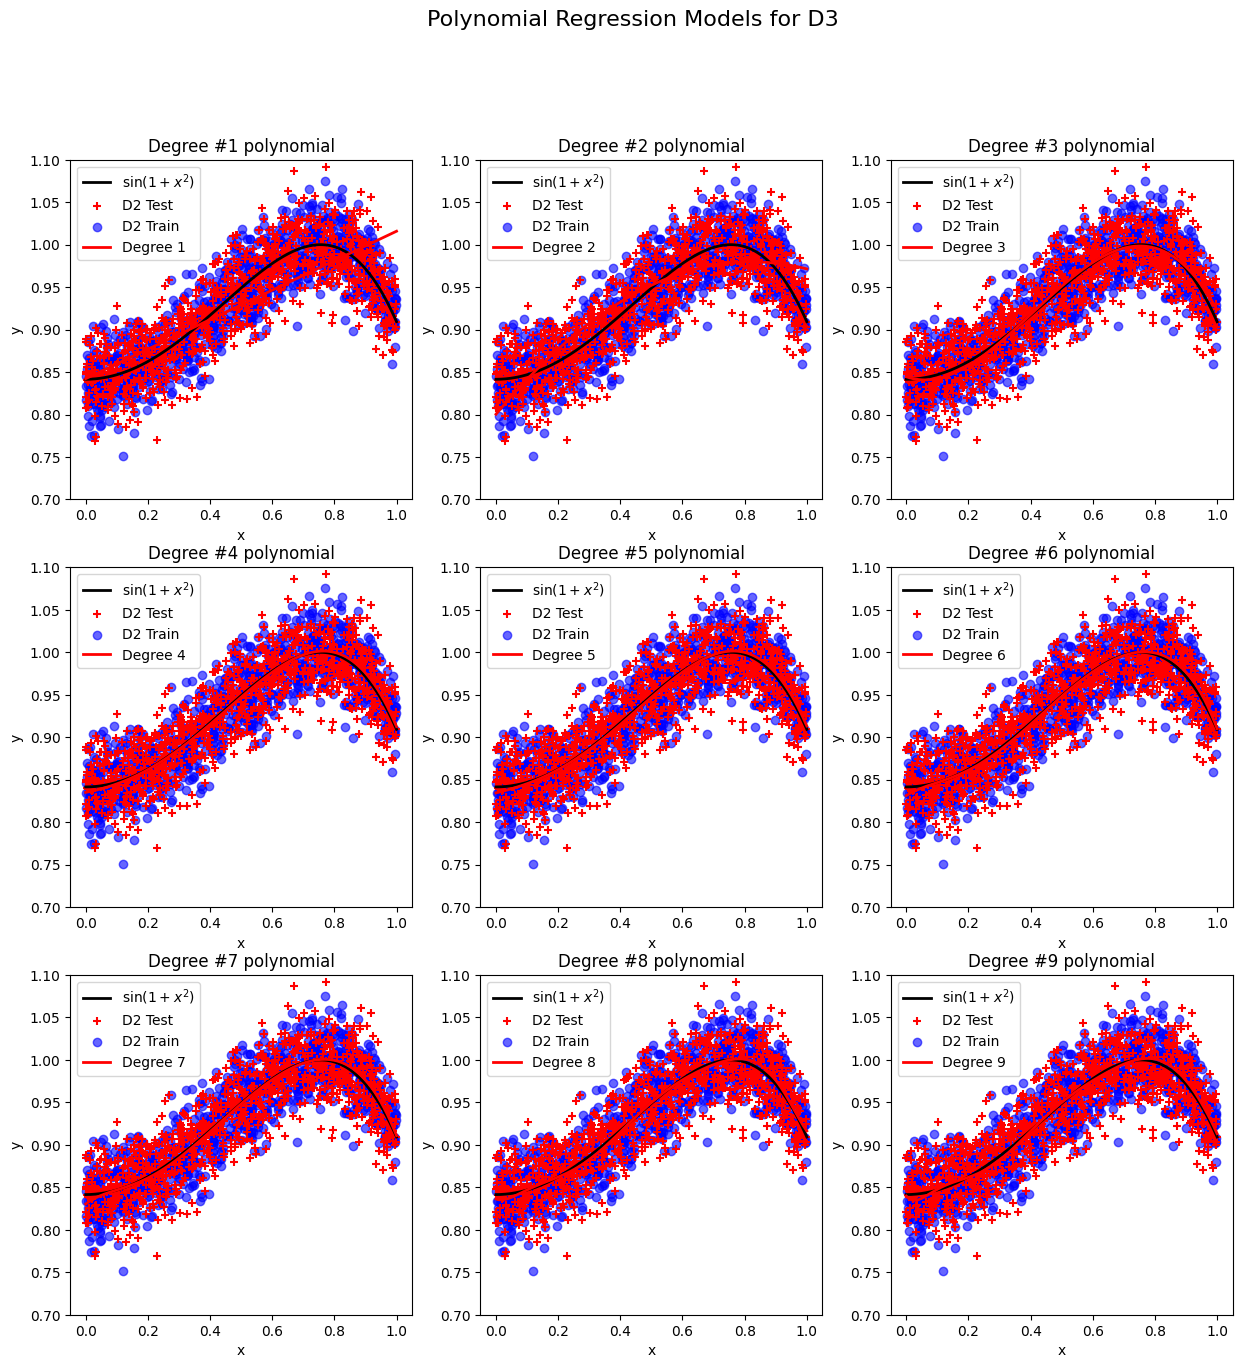

In [217]:
D3_X_poly_list = [pf.fit_transform(D3_X_train) for pf in pf_list]
D3_model_list = [LinearRegression() for _ in range (1,10)] 

for model, X_poly, in zip(D3_model_list, D3_X_poly_list):
    model.fit(X_poly, D3_y_train)

X_range = np.linspace(0, 1, 100).reshape(-1, 1)
X_poly_range_list = [poly.fit_transform(X_range) for poly in pf_list]

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle("Polynomial Regression Models for D3", fontsize=16)

for i, (degree, X_poly_range, model) in enumerate(zip(range(1, 10), X_poly_range_list, D3_model_list)):
    y_pred = model.predict(X_poly_range)
    ax = axs[i // 3, i % 3]
    ax.plot(X_val, y_val, color='black', label=r'$\sin(1 + x^2)$', linewidth=2, zorder=10)
    ax.scatter(D3_X_test, D3_y_test, color='red', marker='+', label='D2 Test', zorder=5)
    ax.scatter(D3_X_train, D3_y_train, color='blue', label='D2 Train', alpha=0.6)
    ax.plot(X_range, y_pred, color='red', label=f'Degree {degree}', linewidth=2, zorder=15)
    ax.set_title(f'Degree #{i+1} polynomial')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_ylim(0.7, 1.1)
    ax.legend()

plt.show()

In [218]:
D3_Ein_list = []
D3_Eout_list = []

D3_X_poly_test_list = [poly.fit_transform(D3_X_test) for poly in pf_list]

for model, X_poly_train, X_poly_test in zip(D3_model_list, D3_X_poly_list, D3_X_poly_test_list):
    y_train_pred = model.predict(X_poly_train)
    E_in = mean_squared_error(D3_y_train, y_train_pred)
    D3_Ein_list.append(E_in)
    y_test_pred = model.predict(X_poly_test)
    E_out = mean_squared_error(D3_y_test, y_test_pred)
    D3_Eout_list.append(E_out)

print(f"According to the graphs above:")
for degree, E_in, E_out in zip(range(1, 10), D3_Ein_list, D3_Eout_list):
    print(f"Degree #{degree}: E_in - {E_in:.4f} | E_out - {E_out:.4f}")

According to the graphs above:
Degree #1: E_in - 0.0015 | E_out - 0.0016
Degree #2: E_in - 0.0011 | E_out - 0.0012
Degree #3: E_in - 0.0008 | E_out - 0.0009
Degree #4: E_in - 0.0008 | E_out - 0.0009
Degree #5: E_in - 0.0008 | E_out - 0.0009
Degree #6: E_in - 0.0008 | E_out - 0.0009
Degree #7: E_in - 0.0008 | E_out - 0.0009
Degree #8: E_in - 0.0008 | E_out - 0.0009
Degree #9: E_in - 0.0008 | E_out - 0.0009


## D3 Data table of $E_{in}$ & $E_{out}$ (N = 1000)

| Degree  | $E_{in}$  |   $E_{out}$    |
|---------|-----------|----------------|
| **1**   | 0.0015    | 0.0016         |
| **2**   | 0.0011    | 0.0012         |
| **3**   | 0.0008    | 0.0009         |
| **4**   | 0.0008    | 0.0009         |
| **5**   | 0.0008    | 0.0009         |
| **6**   | 0.0008    | 0.0009         |
| **7**   | 0.0008    | 0.0009         |
| **8**   | 0.0008    | 0.0009         |
| **9**   | 0.0008    | 0.0009         |


# Trả lời các câu hỏi

## 1 - Tăng độ phức tạp của mô hình ảnh hưởng thế nào đến bias?
Tăng độ phức tạp của mô hình sẽ làm giảm bias. Mô hình phức tạp hơn có khả năng học nhiều đặc điểm hơn và khớp với các dữ liệu hơn, do đó giảm thiểu sai lệch giữa dự đoán của mô hình và giá trị thực tế. Tuy nhiên, nếu tăng độ phức tạp quá mức sễ gây ra hiện tượng overfitting.

## 2 - Tăng độ phức tạp của mô hình ảnh hưởng thế nào đến variance?
Tăng độ phức tạp của mô hình sẽ tăng variance. Mô hình lúc này quá phức tạp, nghĩa là đã tăng sự biến thiên của các dự đoán cho tập dữ liệu, đồng thời mô hình cũng bám sát dữ liệu huấn luyện hơn. Tuy nhiên, khi tăng độ phức tạp quá mức sẽ gây ra overfitting => mô hình có thể đúng với tập train nhưng chưa chắc là đúng với tập test.

## 3 - Tăng kích thước tập train ảnh hưởng thế nào đến bias?
Tăng kích thước tập train thường không ảnh hưởng đáng kể đến bias. Bias chủ yếu phụ thuộc vào cấu trúc và độ phức tạp của mô hình hơn là số lượng dữ liệu. Thế nhưng đôi khi tăng kích thước tập train lại làm giảm bias nếu mô hình đủ phức tạp, tức là lúc này nó có nhiều dữ liệu để học hơn cùng với khả năng học tốt từ mô hình đó.

## 4 - Tăng kích thước tập train ảnh hưởng thế nào đến variance?
Tăng kích thước tập huấn luyện thường giảm variance. Với nhiều dữ liệu hơn, mô hình có thể học được phân phối tổng quát hơn của dữ liệu, giảm thiểu sự nhạy cảm với các biến động ngẫu nhiên trong tập huấn luyện.